In [63]:
import pandas as pd
import numpy as np
import re
import string
import seaborn as sns
sns.set(style="whitegrid")


In [8]:
df_negativos = pd.read_csv('/home/jhonfypy/TwitterUSAirlinesSentiment/ProyectoTwist/data/tweets_negativos_limpios.csv', encoding='utf-8')

In [19]:
df_negativos.head(10)

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,retweet_count,text,tweet_created,tweet_location,user_timezone
0,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,0,@VirginAmerica it's really aggressive to blast...,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
1,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,0,@VirginAmerica and it's a really big bad thing...,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)
2,570300767074181121,negative,1.0000,Can't Tell,0.6842,Virgin America,0,@VirginAmerica seriously would pay $30 a fligh...,2015-02-24 11:14:33 -0800,NaN,Pacific Time (US & Canada)
3,570282469121007616,negative,0.6842,Late Flight,0.3684,Virgin America,0,@VirginAmerica SFO-PDX schedule is still MIA.,2015-02-24 10:01:50 -0800,"palo alto, ca",Pacific Time (US & Canada)
4,570276917301137409,negative,1.0000,Bad Flight,1.0000,Virgin America,0,@VirginAmerica I flew from NYC to SFO last we...,2015-02-24 09:39:46 -0800,this place called NYC,Eastern Time (US & Canada)
5,570265883513384960,negative,0.6705,Can't Tell,0.3614,Virgin America,0,@VirginAmerica why are your first fares in May...,2015-02-24 08:55:56 -0800,NaN,NaN
6,570256553502068736,negative,1.0000,Customer Service Issue,0.3557,Virgin America,0,@VirginAmerica you guys messed up my seating.....,2015-02-24 08:18:51 -0800,714,Mountain Time (US & Canada)
7,570249102404923392,negative,1.0000,Customer Service Issue,1.0000,Virgin America,0,@VirginAmerica status match program. I applie...,2015-02-24 07:49:15 -0800,NaN,NaN
8,570239632807370753,negative,1.0000,Can't Tell,0.6614,Virgin America,0,@VirginAmerica What happened 2 ur vegan food o...,2015-02-24 07:11:37 -0800,NaN,NaN
9,570207886493782019,negative,1.0000,Bad Flight,1.0000,Virgin America,0,@VirginAmerica amazing to me that we can't get...,2015-02-24 05:05:28 -0800,"San Mateo, CA & Las Vegas, NV",NaN


In [9]:
# 1. Promedios de columnas numéricas
promedios = df_negativos.select_dtypes(include='number').mean().reset_index()
promedios.columns = ['Columna', 'Promedio']
display(promedios)


,Columna,Promedio
0,tweet_id,5.692602e+17
1,airline_sentiment_confidence,9.333653e-01
2,negativereason_confidence,7.317688e-01
3,retweet_count,9.337546e-02


In [11]:
# 2. Conteo de frecuencia en columnas categóricas
columnas_categoricas = df_negativos.select_dtypes(include='object').columns
conteos = {col: df_negativos[col].value_counts().head(20) for col in columnas_categoricas}
for col, conteo in conteos.items():
    print(f"Frecuencia de valores en la columna '{col}'---")
    print(conteo)
    print("\n")

Frecuencia de valores en la columna 'airline_sentiment'---
airline_sentiment
negative    9178
Name: count, dtype: int64


Frecuencia de valores en la columna 'negativereason'---
negativereason
Customer Service Issue         2910
Late Flight                    1665
Can't Tell                     1190
Cancelled Flight                847
Lost Luggage                    724
Bad Flight                      580
Flight Booking Problems         529
Flight Attendant Complaints     481
longlines                       178
Damaged Luggage                  74
Name: count, dtype: int64


Frecuencia de valores en la columna 'airline'---
airline
United            2633
US Airways        2263
American          1960
Southwest         1186
Delta              955
Virgin America     181
Name: count, dtype: int64


Frecuencia de valores en la columna 'text'---
text
@AmericanAir robocalls me with another Cancelled Flightation. And then when I don’t accept the change it won’t let me connect to an agent. Just w

# Visisón general del dataset 

In [20]:
df_negativos.columns

Index(['tweet_id', 'airline_sentiment', 'airline_sentiment_confidence',
       'negativereason', 'negativereason_confidence', 'airline',
       'retweet_count', 'text', 'tweet_created', 'tweet_location',
       'user_timezone'],
      dtype='object')

In [22]:
df_negativos.dtypes

tweet_id                          int64
airline_sentiment                object
airline_sentiment_confidence    float64
negativereason                   object
negativereason_confidence       float64
airline                          object
retweet_count                     int64
text                             object
tweet_created                    object
tweet_location                   object
user_timezone                    object
dtype: object

In [24]:
df_negativos.describe()

,tweet_id,airline_sentiment_confidence,negativereason_confidence,retweet_count
count,9.178000e+03,9178.000000,9178.000000,9178.000000
mean,5.692602e+17,0.933365,0.731769,0.093375
std,7.572474e+14,0.138109,0.238276,0.792865
min,5.675900e+17,0.339400,0.312200,0.000000
25%,5.686511e+17,1.000000,0.645300,0.000000
50%,5.695355e+17,1.000000,0.680600,0.000000
75%,5.698798e+17,1.000000,1.000000,0.000000
max,5.703106e+17,1.000000,1.000000,44.000000


In [31]:
df_tweets_negativos = df_negativos[['tweet_id', 'airline_sentiment', 'airline_sentiment_confidence',
       'negativereason', 'negativereason_confidence', 'airline',
       'retweet_count', 'text', 'tweet_created', 'tweet_location',
       'user_timezone']] 

In [33]:
df_tweets_negativos['airline_sentiment'].value_counts()
df_tweets_negativos['airline'].value_counts()

airline
United            2633
US Airways        2263
American          1960
Southwest         1186
Delta              955
Virgin America     181
Name: count, dtype: int64

In [34]:
df_tweets_negativos['tweet_location'].value_counts()

tweet_location
Washington, DC                   111
Boston, MA                       103
New York, NY                      93
New York                          86
Chicago                           68
                                ... 
next city                          1
new york, new york                 1
Iowa City                          1
San Mateo, CA & Las Vegas, NV      1
714                                1
Name: count, Length: 1987, dtype: int64

In [38]:
print(len(df_tweets_negativos['tweet_location'].value_counts()))
print(len(df_tweets_negativos['airline'].value_counts()))
print(len(df_tweets_negativos['airline_sentiment'].value_counts()))

1987
6
1


<Axes: >

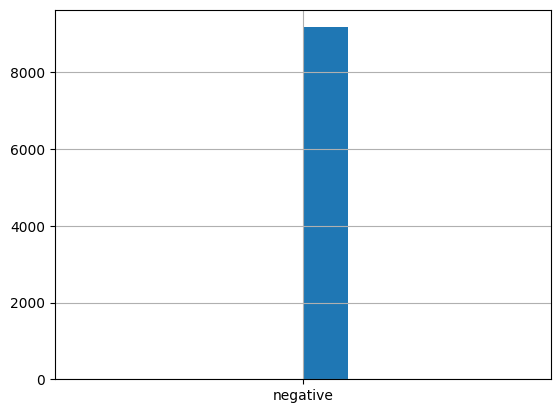

In [39]:
df_tweets_negativos['airline_sentiment'].hist()

<Axes: >

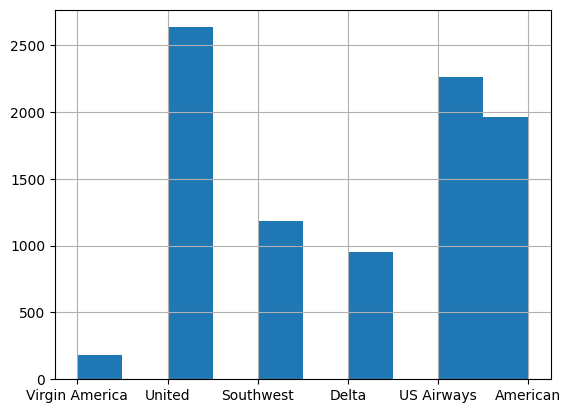

In [41]:
df_tweets_negativos['airline'].hist()

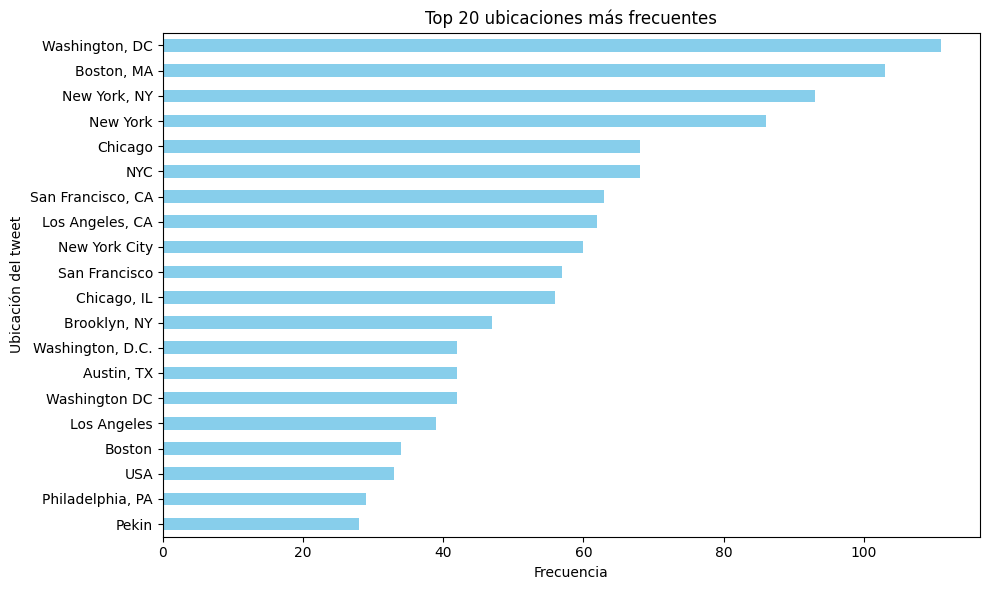

In [44]:
top_ubicaciones = df_tweets_negativos['tweet_location'].value_counts().head(20)

# Graficar como barras horizontales
plt.figure(figsize=(10, 6))
top_ubicaciones.plot(kind='barh', color='skyblue')
plt.title('Top 20 ubicaciones más frecuentes')
plt.xlabel('Frecuencia')
plt.ylabel('Ubicación del tweet')
plt.gca().invert_yaxis()  # Para que la ubicación más frecuente quede arriba
plt.tight_layout()
plt.show()


In [45]:
print("Top 20 ubicaciones más frecuentes:")
print(top_ubicaciones)

Top 20 ubicaciones más frecuentes:
tweet_location
Washington, DC       111
Boston, MA           103
New York, NY          93
New York              86
Chicago               68
NYC                   68
San Francisco, CA     63
Los Angeles, CA       62
New York City         60
San Francisco         57
Chicago, IL           56
Brooklyn, NY          47
Washington, D.C.      42
Austin, TX            42
Washington DC         42
Los Angeles           39
Boston                34
USA                   33
Philadelphia, PA      29
Pekin                 28
Name: count, dtype: int64


<Axes: >

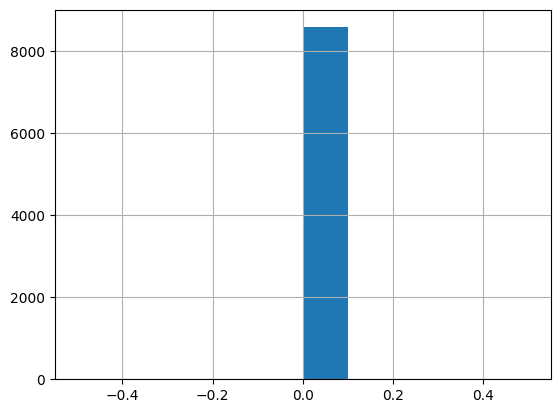

In [51]:
df_tweets_negativos[df_tweets_negativos['retweet_count']< df_tweets_negativos['retweet_count'].quantile(0.95)]['retweet_count'].hist()

In [ ]:
df_tweets_negativos['tweet_length'] = df_tweets_negativos['text'].apply(len)


Text(0.5, 1.0, 'Distribución de la longitud de los tweets (sin outliers)')

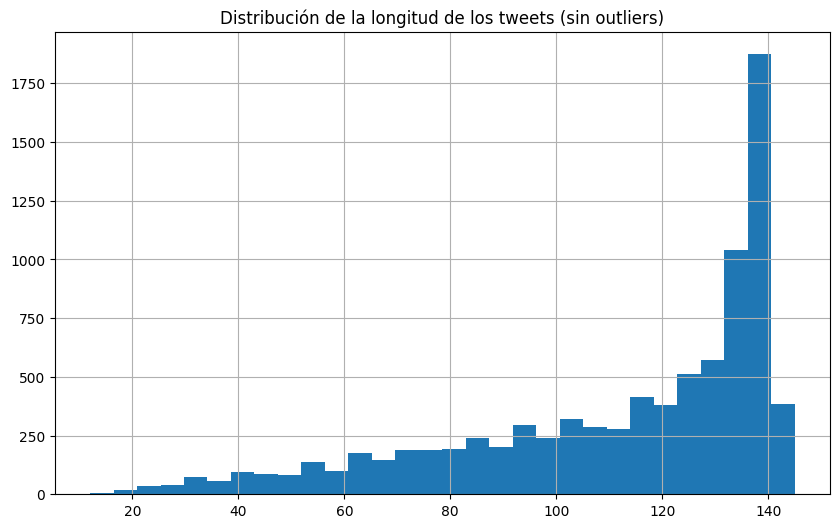

In [58]:
# Graficar la longitud de los tweets, excluyendo los valores atípicos
df_tweets_negativos[df_tweets_negativos['tweet_length'] < df_tweets_negativos['tweet_length'].quantile(0.95)]['tweet_length'].hist(bins=30, figsize=(10, 6))
plt.title('Distribución de la longitud de los tweets (sin outliers)')

# Análisis Unidimensional

In [59]:
# 1. Promedios de columnas numéricas
promedios = df_tweets_negativos.select_dtypes(include='number').mean().reset_index()
promedios.columns = ['Columna', 'Promedio']
display(promedios)

,Columna,Promedio
0,tweet_id,5.692602e+17
1,airline_sentiment_confidence,9.333653e-01
2,negativereason_confidence,7.317688e-01
3,retweet_count,9.337546e-02
4,tweet_length,1.139479e+02


In [60]:
# 2. Conteo de frecuencia en columnas categóricas
columnas_categoricas = df_tweets_negativos.select_dtypes(include='object').columns
conteos = {col: df_negativos[col].value_counts().head(10) for col in columnas_categoricas}
for col, conteo in conteos.items():
    print(f"\n--- Conteo de los 10 valores más frecuentes en '{col}' ---")
    print(conteo)


--- Conteo de los 10 valores más frecuentes en 'airline_sentiment' ---
airline_sentiment
negative    9178
Name: count, dtype: int64

--- Conteo de los 10 valores más frecuentes en 'negativereason' ---
negativereason
Customer Service Issue         2910
Late Flight                    1665
Can't Tell                     1190
Cancelled Flight                847
Lost Luggage                    724
Bad Flight                      580
Flight Booking Problems         529
Flight Attendant Complaints     481
longlines                       178
Damaged Luggage                  74
Name: count, dtype: int64

--- Conteo de los 10 valores más frecuentes en 'airline' ---
airline
United            2633
US Airways        2263
American          1960
Southwest         1186
Delta              955
Virgin America     181
Name: count, dtype: int64

--- Conteo de los 10 valores más frecuentes en 'text' ---
text
@AmericanAir robocalls me with another Cancelled Flightation. And then when I don’t accept the chan

In [61]:
# 3. Estadísticas descriptivas (máx, mín, std, etc.)
descripcio = df_tweets_negativos.describe(include='all').T
display(descripcio)

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
tweet_id,9178.0,NaN,NaN,NaN,569260233957160320.0,757247434435229.125,567590027375702016.0,568651131501547520.0,569535505821460480.0,569879787570912256.0,570310600460525568.0
airline_sentiment,9178,1,negative,9178,NaN,NaN,NaN,NaN,NaN,NaN,NaN
airline_sentiment_confidence,9178.0,NaN,NaN,NaN,0.933365,0.138109,0.3394,1.0,1.0,1.0,1.0
negativereason,9178,10,Customer Service Issue,2910,NaN,NaN,NaN,NaN,NaN,NaN,NaN
negativereason_confidence,9178.0,NaN,NaN,NaN,0.731769,0.238276,0.3122,0.6453,0.6806,1.0,1.0
airline,9178,6,United,2633,NaN,NaN,NaN,NaN,NaN,NaN,NaN
retweet_count,9178.0,NaN,NaN,NaN,0.093375,0.792865,0.0,0.0,0.0,0.0,44.0
text,9178,9087,@AmericanAir robocalls me with another Cancell...,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
tweet_created,9178,8991,2015-02-24 11:43:05 -0800,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
tweet_location,6036,1987,"Washington, DC",111,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [62]:
print("Mínima fecha de tweet:", df_tweets_negativos['tweet_created'].min())
print("Máxima fecha de tweet:", df_tweets_negativos['tweet_created'].max())


Mínima fecha de tweet: 2015-02-16 23:43:02 -0800
Máxima fecha de tweet: 2015-02-24 11:53:37 -0800


Text(0.5, 1.0, 'Distribución de retweet_count (sin outliers)')

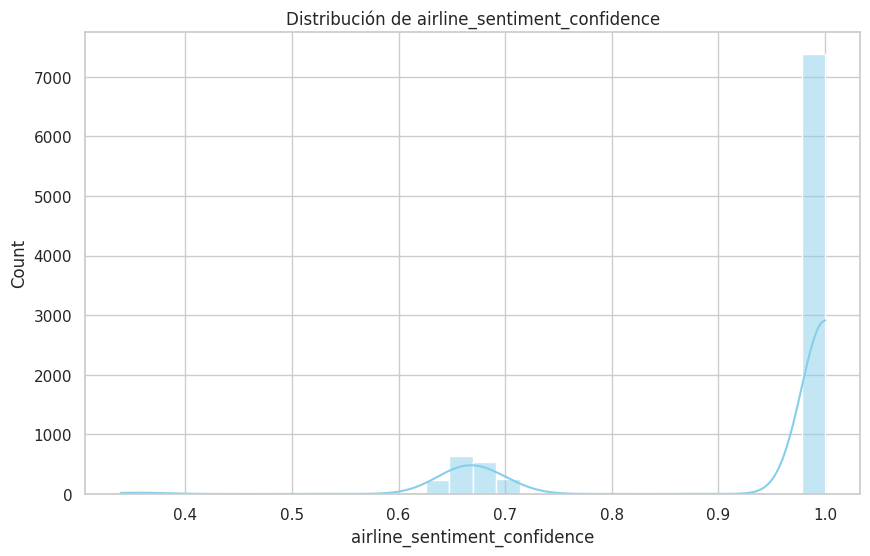

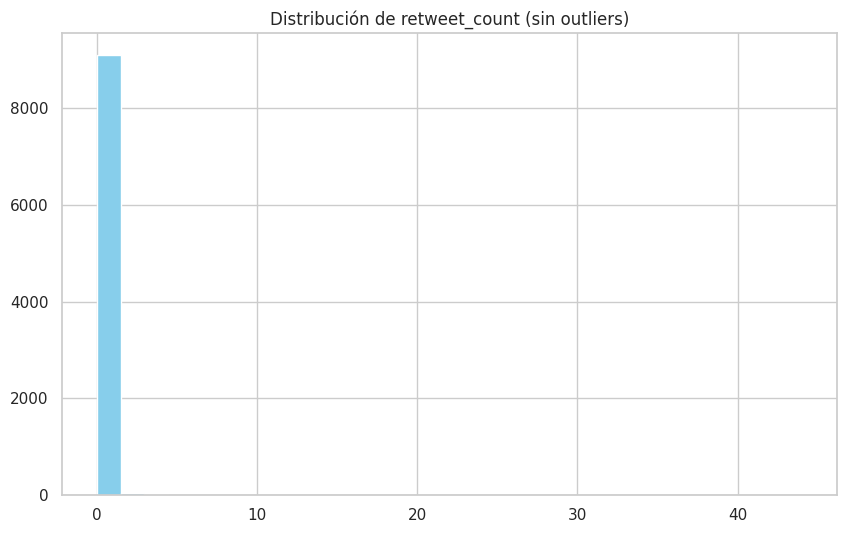

In [65]:
plt.figure(figsize=(10, 6))
sns.histplot(df_tweets_negativos, x= 'airline_sentiment_confidence', bins=30, kde=True, color='skyblue')
plt.title('Distribución de airline_sentiment_confidence')
plt.figure(figsize=(10, 6))
df_tweets_negativos['retweet_count'].hist(bins=30, color='skyblue')
plt.title('Distribución de retweet_count (sin outliers)')   

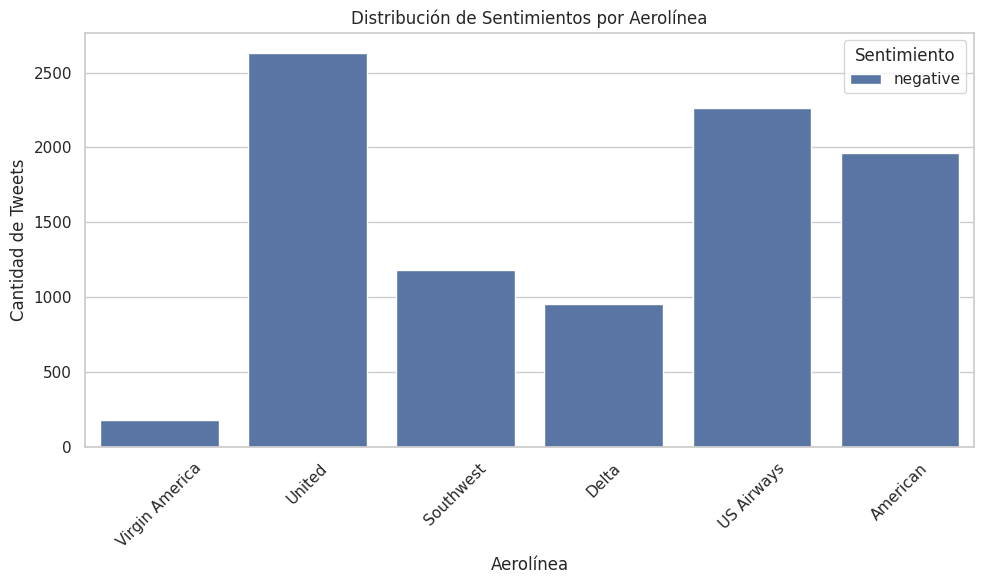

In [66]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df_tweets_negativos , x='airline', hue='airline_sentiment')
plt.title("Distribución de Sentimientos por Aerolínea")
plt.xlabel("Aerolínea")
plt.ylabel("Cantidad de Tweets")
plt.xticks(rotation=45)
plt.legend(title='Sentimiento')
plt.tight_layout()
plt.show()

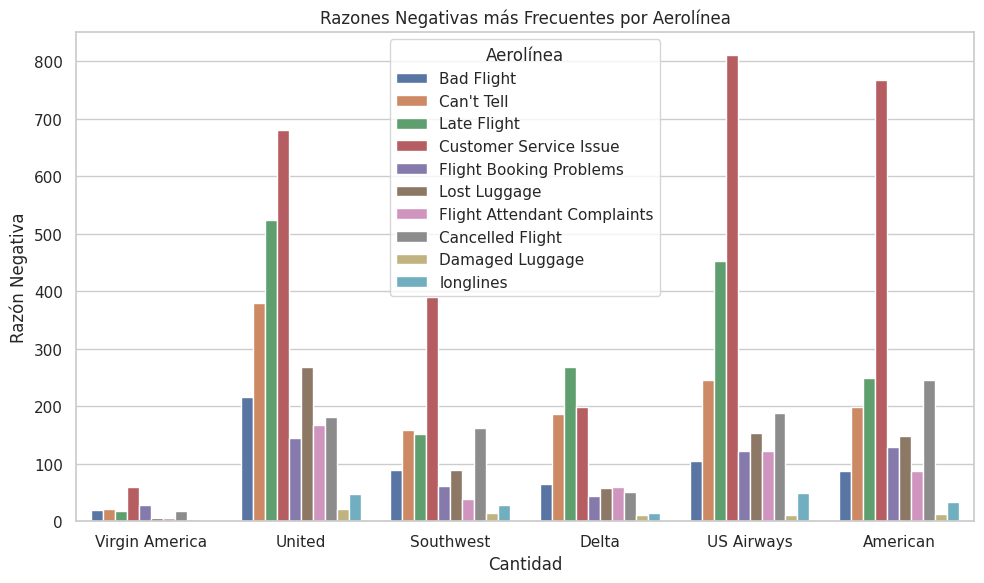

In [67]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df_tweets_negativos[df_tweets_negativos['airline_sentiment'] == 'negative'], x='airline', hue='negativereason')
plt.title("Razones Negativas más Frecuentes por Aerolínea")
plt.xlabel("Cantidad")
plt.ylabel("Razón Negativa")
plt.legend(title="Aerolínea")
plt.tight_layout()
plt.show()

In [69]:
df_tweets_negativos['tweet_length'] = df_tweets_negativos['text'].apply(len)

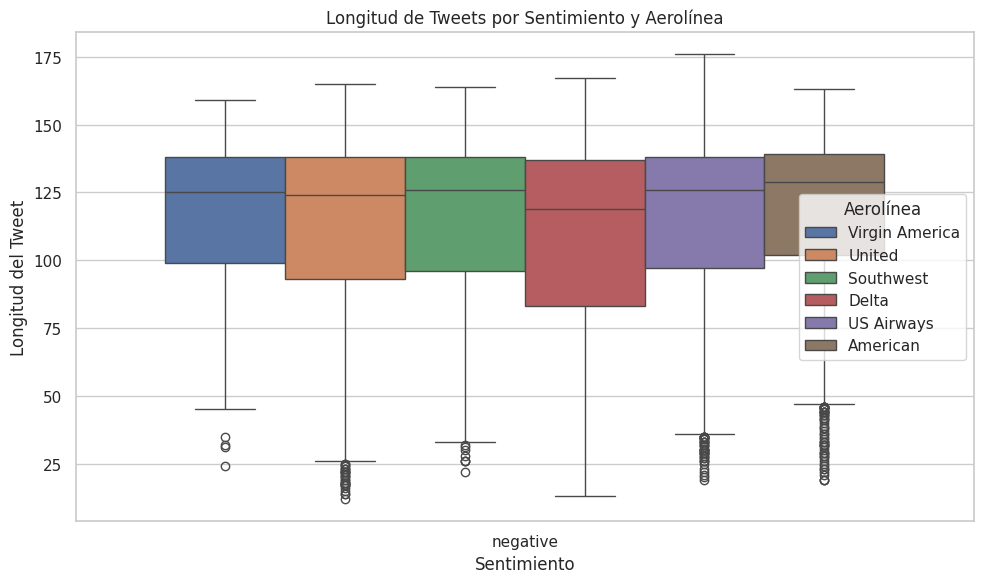

In [70]:
#Ahora graficamos
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_tweets_negativos, x='airline_sentiment', y='tweet_length', hue='airline')
plt.title("Longitud de Tweets por Sentimiento y Aerolínea")
plt.xlabel("Sentimiento")
plt.ylabel("Longitud del Tweet")
plt.legend(title='Aerolínea')
plt.tight_layout()
plt.show()

/tmp/ipykernel_7555/3281235083.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_tweets_negativos, x='airline_sentiment', y='tweet_length', palette='Set2')


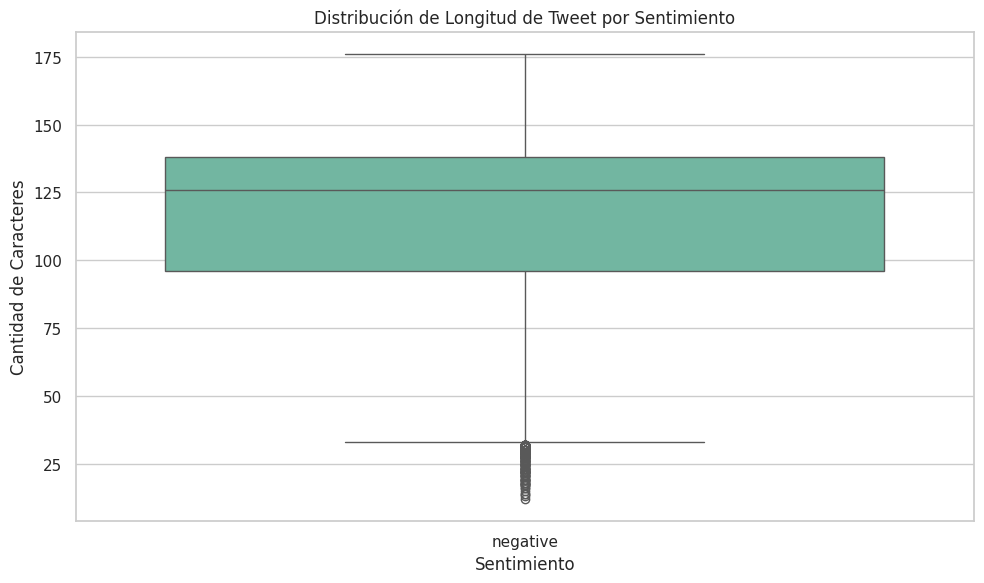

In [71]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_tweets_negativos, x='airline_sentiment', y='tweet_length', palette='Set2')
plt.title("Distribución de Longitud de Tweet por Sentimiento")
plt.xlabel("Sentimiento")
plt.ylabel("Cantidad de Caracteres")
plt.tight_layout()
plt.show()

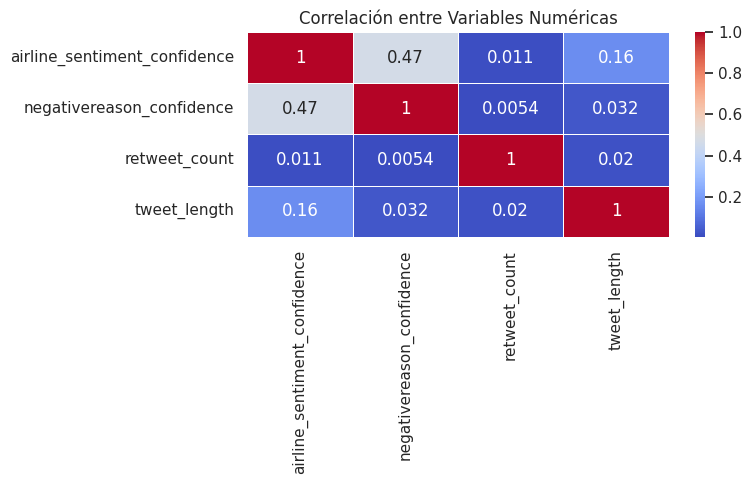

In [72]:
plt.figure(figsize=(8, 5))
sns.heatmap(df_tweets_negativos[['airline_sentiment_confidence', 'negativereason_confidence', 'retweet_count', 'tweet_length']].corr(),
            annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlación entre Variables Numéricas")
plt.tight_layout()
plt.show()


In [78]:
sum_importe_negativos1 = df_tweets_negativos.groupby('airline').agg({'airline_sentiment_confidence': 'mean',
                                                                  'negativereason_confidence': 'mean',
                                                                  'retweet_count': 'mean',
                                                                  'tweet_length': 'mean'}).reset_index()
sum_importe_negativos2 = sum_importe_negativos.rename(columns={'airline_sentiment_confidence': 'mean_airline_sentiment_confidence',
                                                              'negativereason_confidence': 'mean_negativereason_confidence',
                                                              'retweet_count': 'mean_retweet_count',
                                                              'tweet_length': 'mean_tweet_length'})
sum_importe_negativos3 = sum_importe_negativos.sort_values(by='mean_airline_sentiment_confidence', ascending=False).head(10)

In [ ]:
sum_importe_negativos1


,airline,mean_airline_sentiment_confidence,mean_negativereason_confidence,mean_retweet_count,mean_tweet_length
3,US Airways,0.945714,0.750028,0.091471,114.571807
0,American,0.944955,0.744644,0.047449,117.622449
4,United,0.933383,0.714719,0.147360,112.225978
2,Southwest,0.920533,0.732866,0.048061,115.559022
1,Delta,0.902202,0.710520,0.115183,107.404188
5,Virgin America,0.901733,0.717003,0.011050,115.375691


In [79]:
sum_importe_negativos2

,airline,mean_airline_sentiment_confidence,mean_negativereason_confidence,mean_retweet_count,mean_tweet_length
3,US Airways,0.945714,0.750028,0.091471,114.571807
0,American,0.944955,0.744644,0.047449,117.622449
4,United,0.933383,0.714719,0.147360,112.225978
2,Southwest,0.920533,0.732866,0.048061,115.559022
1,Delta,0.902202,0.710520,0.115183,107.404188
5,Virgin America,0.901733,0.717003,0.011050,115.375691


In [80]:
sum_importe_negativos3

,airline,mean_airline_sentiment_confidence,mean_negativereason_confidence,mean_retweet_count,mean_tweet_length
3,US Airways,0.945714,0.750028,0.091471,114.571807
0,American,0.944955,0.744644,0.047449,117.622449
4,United,0.933383,0.714719,0.147360,112.225978
2,Southwest,0.920533,0.732866,0.048061,115.559022
1,Delta,0.902202,0.710520,0.115183,107.404188
5,Virgin America,0.901733,0.717003,0.011050,115.375691


In [83]:
# Contar y ordenar los tweets negativos por aerolínea

airlines_neg_counts = df_tweets_negativos['airline'].value_counts().reset_index()
airlines_neg_counts.columns = ['Aerolínea', 'Cantidad_Tweets_Negativos']
airlines_neg_counts = airlines_neg_counts.sort_values(by='Cantidad_Tweets_Negativos', ascending=False).head
print(airlines_neg_counts)

<bound method NDFrame.head of         Aerolínea  Cantidad_Tweets_Negativos
0          United                       2633
1      US Airways                       2263
2        American                       1960
3       Southwest                       1186
4           Delta                        955
5  Virgin America                        181>


In [88]:
# Contar tweets negativos por aerolínea (con paréntesis correctos)
airlines_neg_counts = df_tweets_negativos['airline'].value_counts().reset_index()
airlines_neg_counts.columns = ['Aerolínea', 'Cantidad_Tweets_Negativos']
print(airlines_neg_counts)

        Aerolínea  Cantidad_Tweets_Negativos
0          United                       2633
1      US Airways                       2263
2        American                       1960
3       Southwest                       1186
4           Delta                        955
5  Virgin America                        181


/tmp/ipykernel_7555/2820725494.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=airlines_neg_counts, x='Cantidad_Tweets_Negativos', y='Aerolínea', palette='Reds_r')


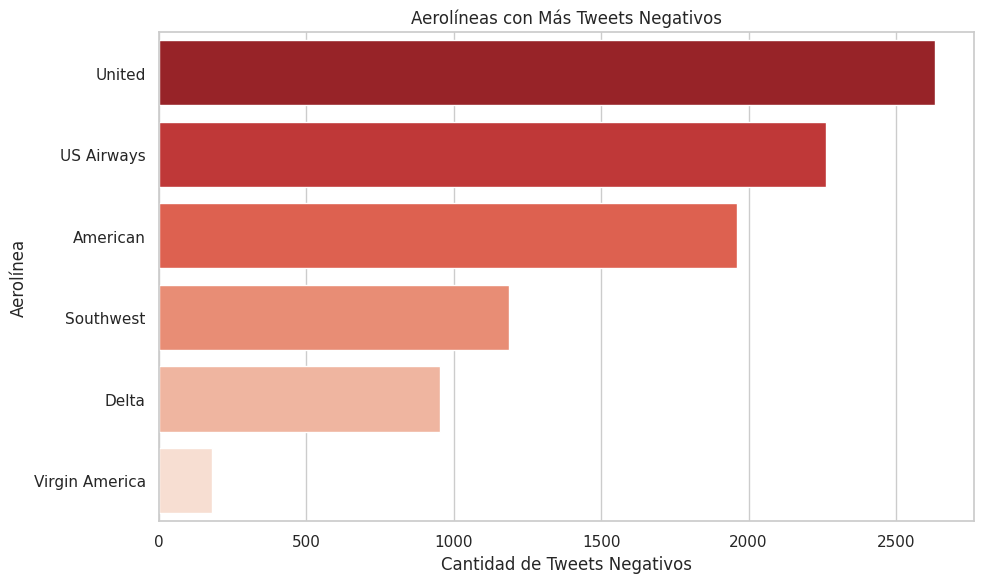

In [87]:
plt.figure(figsize=(10, 6))
sns.barplot(data=airlines_neg_counts, x='Cantidad_Tweets_Negativos', y='Aerolínea', palette='Reds_r')
plt.title('Aerolíneas con Más Tweets Negativos')
plt.xlabel('Cantidad de Tweets Negativos')
plt.ylabel('Aerolínea')
plt.tight_layout()
plt.show()

# Analisis de texto 
* ¿Cuáles son las palabras más frecuentes? 
* ¿Qué temas o razones negativas son más comunes? * ¿Cómo se visualiza eso con nubes de palabras o gráficos de barras?

In [91]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /home/jhonfypy/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/jhonfypy/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [97]:
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /home/jhonfypy/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/jhonfypy/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [96]:
print(stopwords.words('spanish'))

['de', 'la', 'que', 'el', 'en', 'y', 'a', 'los', 'del', 'se', 'las', 'por', 'un', 'para', 'con', 'no', 'una', 'su', 'al', 'lo', 'como', 'más', 'pero', 'sus', 'le', 'ya', 'o', 'este', 'sí', 'porque', 'esta', 'entre', 'cuando', 'muy', 'sin', 'sobre', 'también', 'me', 'hasta', 'hay', 'donde', 'quien', 'desde', 'todo', 'nos', 'durante', 'todos', 'uno', 'les', 'ni', 'contra', 'otros', 'ese', 'eso', 'ante', 'ellos', 'e', 'esto', 'mí', 'antes', 'algunos', 'qué', 'unos', 'yo', 'otro', 'otras', 'otra', 'él', 'tanto', 'esa', 'estos', 'mucho', 'quienes', 'nada', 'muchos', 'cual', 'poco', 'ella', 'estar', 'estas', 'algunas', 'algo', 'nosotros', 'mi', 'mis', 'tú', 'te', 'ti', 'tu', 'tus', 'ellas', 'nosotras', 'vosotros', 'vosotras', 'os', 'mío', 'mía', 'míos', 'mías', 'tuyo', 'tuya', 'tuyos', 'tuyas', 'suyo', 'suya', 'suyos', 'suyas', 'nuestro', 'nuestra', 'nuestros', 'nuestras', 'vuestro', 'vuestra', 'vuestros', 'vuestras', 'esos', 'esas', 'estoy', 'estás', 'está', 'estamos', 'estáis', 'están', 'e

In [98]:
texto_airline = ''
for row in df_tweets_negativos.itertuples():
    texto_airline += ' ' + row.text

In [101]:
stop_words_list = stopwords.words('spanish') + ['a', 'de', 'la', 'y', 'en', 'el', 'que', 'los', 'del', 'las', 'con', 'por', 'un', 'una', 'para', 'es', 'se', 'al']


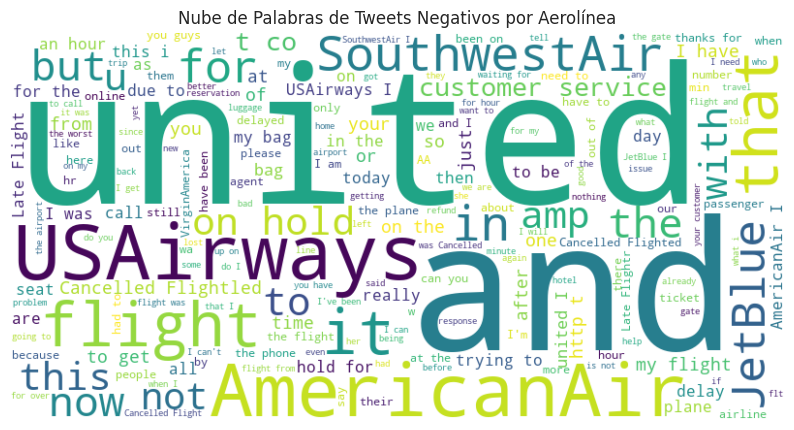

In [103]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt 
wordcloud = WordCloud(width=800, height=400, background_color='white', stopwords=stop_words_list).generate(texto_airline)
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Nube de Palabras de Tweets Negativos por Aerolínea')
plt.show()